In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# import data
df = pd.read_csv('Automobile_data.csv')

------------
# Clean the data

In [3]:
# Remove null values
df = df.replace('?', np.nan)
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['price'] = pd.to_numeric(df['price'])

In [4]:
# Fix column names
df['avg_mpg'] = (df['city-mpg'] + df['highway-mpg']) / 2
df['curb_weight'] = df['curb-weight']
df['body_style'] = df['body-style']
df['fuel_type'] = df['fuel-type']
df['drive_wheels'] = df['drive-wheels']
df['wheel_base'] = df['wheel-base']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

----------
# Simple Linear Regression

Target variable: `price`
Feature variable: `avg_mpg`

In [6]:
# make model
slr_model = smf.ols('price ~ avg_mpg', data=df).fit()
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     161.0
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           7.63e-26
Time:                        15:59:45   Log-Likelihood:                -1548.9
No. Observations:                 159   AIC:                             3102.
Df Residuals:                     157   BIC:                             3108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.11e+04   1583.646     19.641      0.000     2.8e+04    3.42e+04
avg_mpg     -670.9148     52.870    -12.690      0.000    -775.343    -566.487
==============================================================================
Omnibus:                       56.883   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.064
Skew:                           1.608   Prob(JB):                     1.89e-27
Kurtosis:                       5.870   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

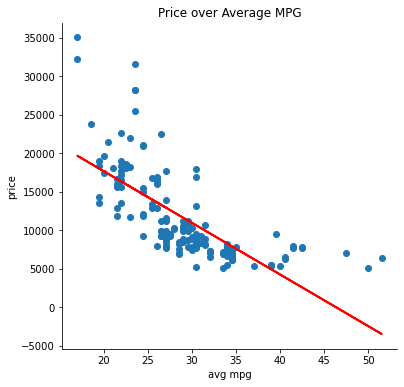

In [7]:
# plot slr model
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['avg_mpg'], df['price'])
ax.set_xlabel('avg mpg')
ax.set_ylabel('price')
ax.set_title('Price over Average MPG')

# regression line
beta, y_inter = np.polyfit(df['avg_mpg'], df['price'], 1)
ax.plot(df['avg_mpg'], beta * df['avg_mpg'] + y_inter, c='red', lw=2)

#clean up plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [8]:
# Find slope and parameters
b_0, b_1 = slr_model.params

In [9]:
print(f'price = {np.round(b_0, 2)} {np.round(b_1, 2)} * avg_mpg')

price = 31104.8 -670.91 * avg_mpg


In [10]:
def estimate_price_from_avg_mpg(avg_mpg_new):
    return np.round(b_0 + b_1 * avg_mpg_new,2)

In [11]:
estimate_price_from_avg_mpg(30)

10977.36

----
# Multiple Linear Regression

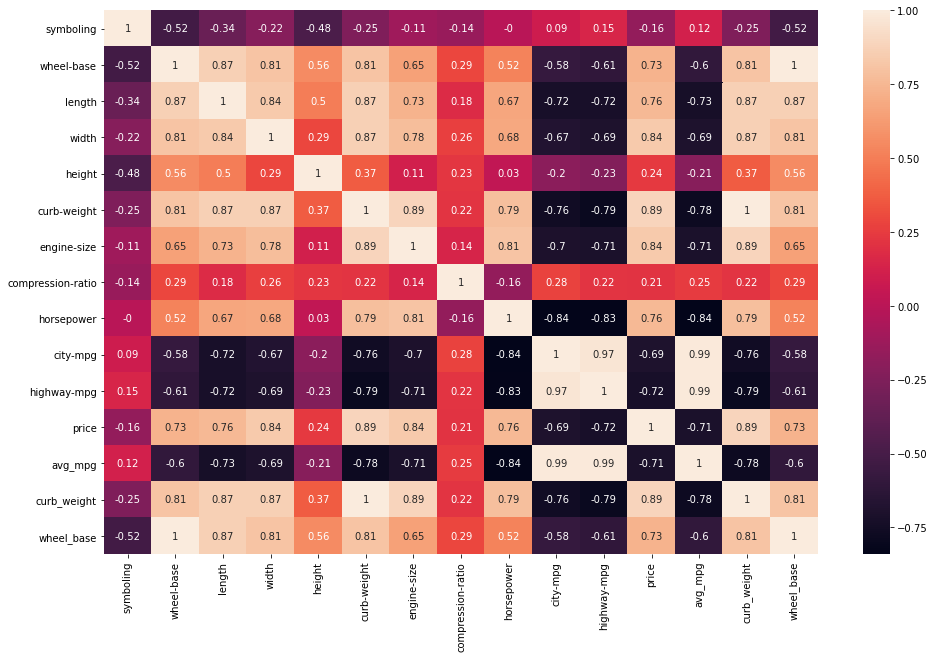

In [12]:
# Check correlation of numeric variables
import seaborn as sns
correlation_matrix = df.corr().round(2)
plt.figure(figsize = (16, 10))
sns.heatmap(data=correlation_matrix, annot=True)

plt.show()

Target: `price` Feature variables: `avg_mpg`, `wheel_base`, `fuel_type`

In [13]:
# Makde mlr model
mlr_model = smf.ols('price ~ avg_mpg + wheel_base + fuel_type', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.76e-40
Time:                        15:59:46   Log-Likelihood:                -1509.4
No. Observations:                 159   AIC:                             3027.
Df Residuals:                     155   BIC:                             3039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -682.8180   9442.703     -0.072      0.942   -1.93e+04     1.8e+04
fuel_type[T.gas] -5304.4989   1089.712     -4.868      0.000   -7457.103   -3151.895
avg_mpg           -548.1451     60.307     -9.089      0.000    -667.275    -429.015
wheel_base         335.7716     76.119      4.411      0.000     185.407     486.137
==============================================================================
Omnibus:                       81.635   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.088
Skew:                           1.900   Prob(JB):                     1.07e-83
Kurtosis:                       9.576   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""